In [2]:
import numpy as np
from numpy.polynomial import polynomial as P
from matplotlib import pyplot as plt

# Problem 1 - Erwthma 1

In [22]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=variance, size=number)
    return noise

def create_x(number):
    lin = np.linspace(start=0.0, stop=2.0, num=number)
    return lin

def create_y(x, theta):
    x_power2 = np.power(x, 2)
    x_power3 = np.power(x, 3)
    x_power5 = np.power(x, 5)
    y = 0.2 - 1 * x + 0.9 * x_power2 + 0.7 * x_power3 - 0.2 * x_power5 + noise
    return y

In [4]:
noise = white_noise(20, 0.1)
noise

array([-0.07696611, -0.09076444,  0.07468889, -0.20592771, -0.03628397,
        0.150357  ,  0.01376212, -0.03424874, -0.0877028 , -0.1377195 ,
       -0.06190248, -0.13849223,  0.00511669, -0.15093412,  0.03556668,
        0.14372722, -0.03863193,  0.01145297, -0.02621047, -0.19512367])

In [5]:
x = create_points(20)
x

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [6]:
y = create_distribution(x, noise, 20)
y

array([ 0.12303389,  0.01475856,  0.11050063, -0.21055054, -0.04817405,
        0.16732716,  0.09743947,  0.1541514 ,  0.2417434 ,  0.36523252,
        0.64067032,  0.78067998,  1.145629  ,  1.2000092 ,  1.56666014,
        1.80128606,  1.6639613 ,  1.64525089,  1.38760109,  0.80487633])

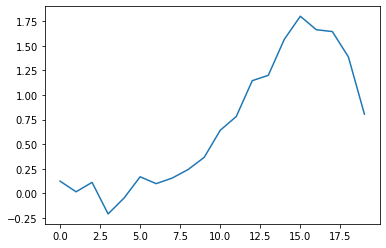

In [7]:
plt.plot(y)
plt.show()

In [15]:
lsv = np.polyfit(x, y, 5)
lsv

array([-0.81146434,  2.54853105, -2.69679817,  2.36220856, -1.00515667,
        0.11907661])

In [16]:
def mse(y, x):
    return np.square(np.subtract(y, x)).mean()

In [17]:
train_set = np.random.uniform(low = 0.0, high = 2.0, size = (20, ))
mse_train = mse(y, train_set)
mse_train

1.120707462837672

In [19]:
test_set = np.random.uniform(low = 0.0, high = 2.0, size = (1000, ))
y_test = lsv[0] + lsv[1] * test_set + lsv[2] * test_set**2.0 + lsv[3] * test_set**3.0 +\
         lsv[4] * test_set**4.0 + lsv[5] * test_set**5.0
mse_test = mse(y_test, test_set)
mse_test

0.6812697185642949

# Problem 1 - Erwthma 2

In [23]:
def create_distribution(x, polynomial_degree, theta, noise):
    y = 0
    for i in range(polynomial_degree + 1):
        y += theta[i] * (np.power(x, i))
    y += noise
    return y

In [ ]:
for i in range(1, 101):
    noise = white_noise(20, 0.1)
    x = create_points(20)
    y = create_y(x, noise, 20)
    lsv_2 = np.polyfit(x, y, 2)
    lsv_10 = np.polyfit(x, y, 10)
    y_test_2 = create_distribution(x, 2, lsv_2, np.zeros(20))
    y_test_10 = create_distribution(x, 10, lsv_10, np.zeros(20))
    means_2.append(np.mean(y_test_2))
    stdevs_2.append(np.std(y_test_2))
    means_10.append(np.mean(y_test_10))
    stdevs_10.append(np.std(y_test_10))